In [1]:
# loading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import datetime
import geopandas as gpd
import matplotlib.patches as mpatches

from sklearn.metrics import mean_squared_error


plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

import helper

import matplotlib.style as style
plt.style.use("markerr.mplstyle")

In [2]:
zori_pred_lasso = pd.read_csv('zori_pred_lasso_base.csv',
                             index_col = 0, parse_dates = ['Time'])

zori_pred_rf = pd.read_csv('rand_forest_backtest_outlook.csv',
                           index_col = 0, parse_dates = ['Time'])

zori_pred_xg = pd.read_csv('xgboost_backtest_outlook.csv',
                           index_col = 0, parse_dates = ['Time'])


colors = ['#7BA0C0', '#B3B6BA','#dbddde']
fig, ax = plt.subplots()
g = sns.barplot(data = zori_pred, 
                 x = 'Time',y = 'zori_ssa', 
                 hue = 'model_code', ci = None, linewidth=3,
                ax = ax, 
                 palette = colors
                )

In [6]:
zori_pred = pd.concat([zori_pred_lasso, zori_pred_rf, zori_pred_xg]).reset_index(drop = True)

zori_pred = zori_pred.loc[zori_pred['Time']<datetime.datetime(2021,7,2),:].reset_index(drop=True)
zori_pred = zori_pred.loc[zori_pred['Time']>datetime.datetime(2020,7,2),:].reset_index(drop=True)





In [4]:
y_pred_test = clf.predict(X_test)


rms = mean_squared_error(y_test, y_pred_test, squared=False)
rms

,Time,zip_code,zori_ssa,model_code
0,2014-01-01,77494.0,1390.0000,actual_values
1,2014-02-01,77494.0,1387.0000,actual_values
2,2014-03-01,77494.0,1384.0000,actual_values
3,2014-04-01,77494.0,1381.0000,actual_values
4,2014-05-01,77494.0,1379.0000,actual_values
...,...,...,...,...
34968,2022-07-01,78245.0,1354.4451,Tree Based XGBoost
34969,2022-07-01,77429.0,1704.6971,Tree Based XGBoost
34970,2022-07-01,75052.0,1575.3186,Tree Based XGBoost
34971,2022-07-01,78741.0,1443.1318,Tree Based XGBoost


In [15]:
act_values = zori_pred.loc[zori_pred['model_code']=='actual_values'
                          ][['Time','zip_code','zori_ssa']]
act_values.columns = ['Time','zip_code','actual_rent']

In [9]:
zori_pred.model_code.unique()

array(['actual_values', 'lasso_base', 'Random Forest',
       'Tree Based XGBoost'], dtype=object)

In [23]:
lasso = zori_pred.loc[zori_pred['model_code']=='lasso_base'].reset_index()
lasso_act = lasso.merge(act_values,how = 'left', on = ['Time','zip_code'])

In [24]:
rf = zori_pred.loc[zori_pred['model_code']=='Random Forest'].reset_index()
rf_act = rf.merge(act_values,how = 'left', on = ['Time','zip_code'])

In [25]:
xg = zori_pred.loc[zori_pred['model_code']=='Tree Based XGBoost'].reset_index()
xg_act = xg.merge(act_values,how = 'left', on = ['Time','zip_code'])

In [30]:
lasso_rmse = mean_squared_error(lasso_act['actual_rent'], lasso_act['zori_ssa'], squared=False)


In [31]:
rf_rmse = mean_squared_error(rf_act['actual_rent'], rf_act['zori_ssa'], squared=False)

In [32]:
xg_rmse = mean_squared_error(xg_act['actual_rent'], xg_act['zori_ssa'], squared=False)

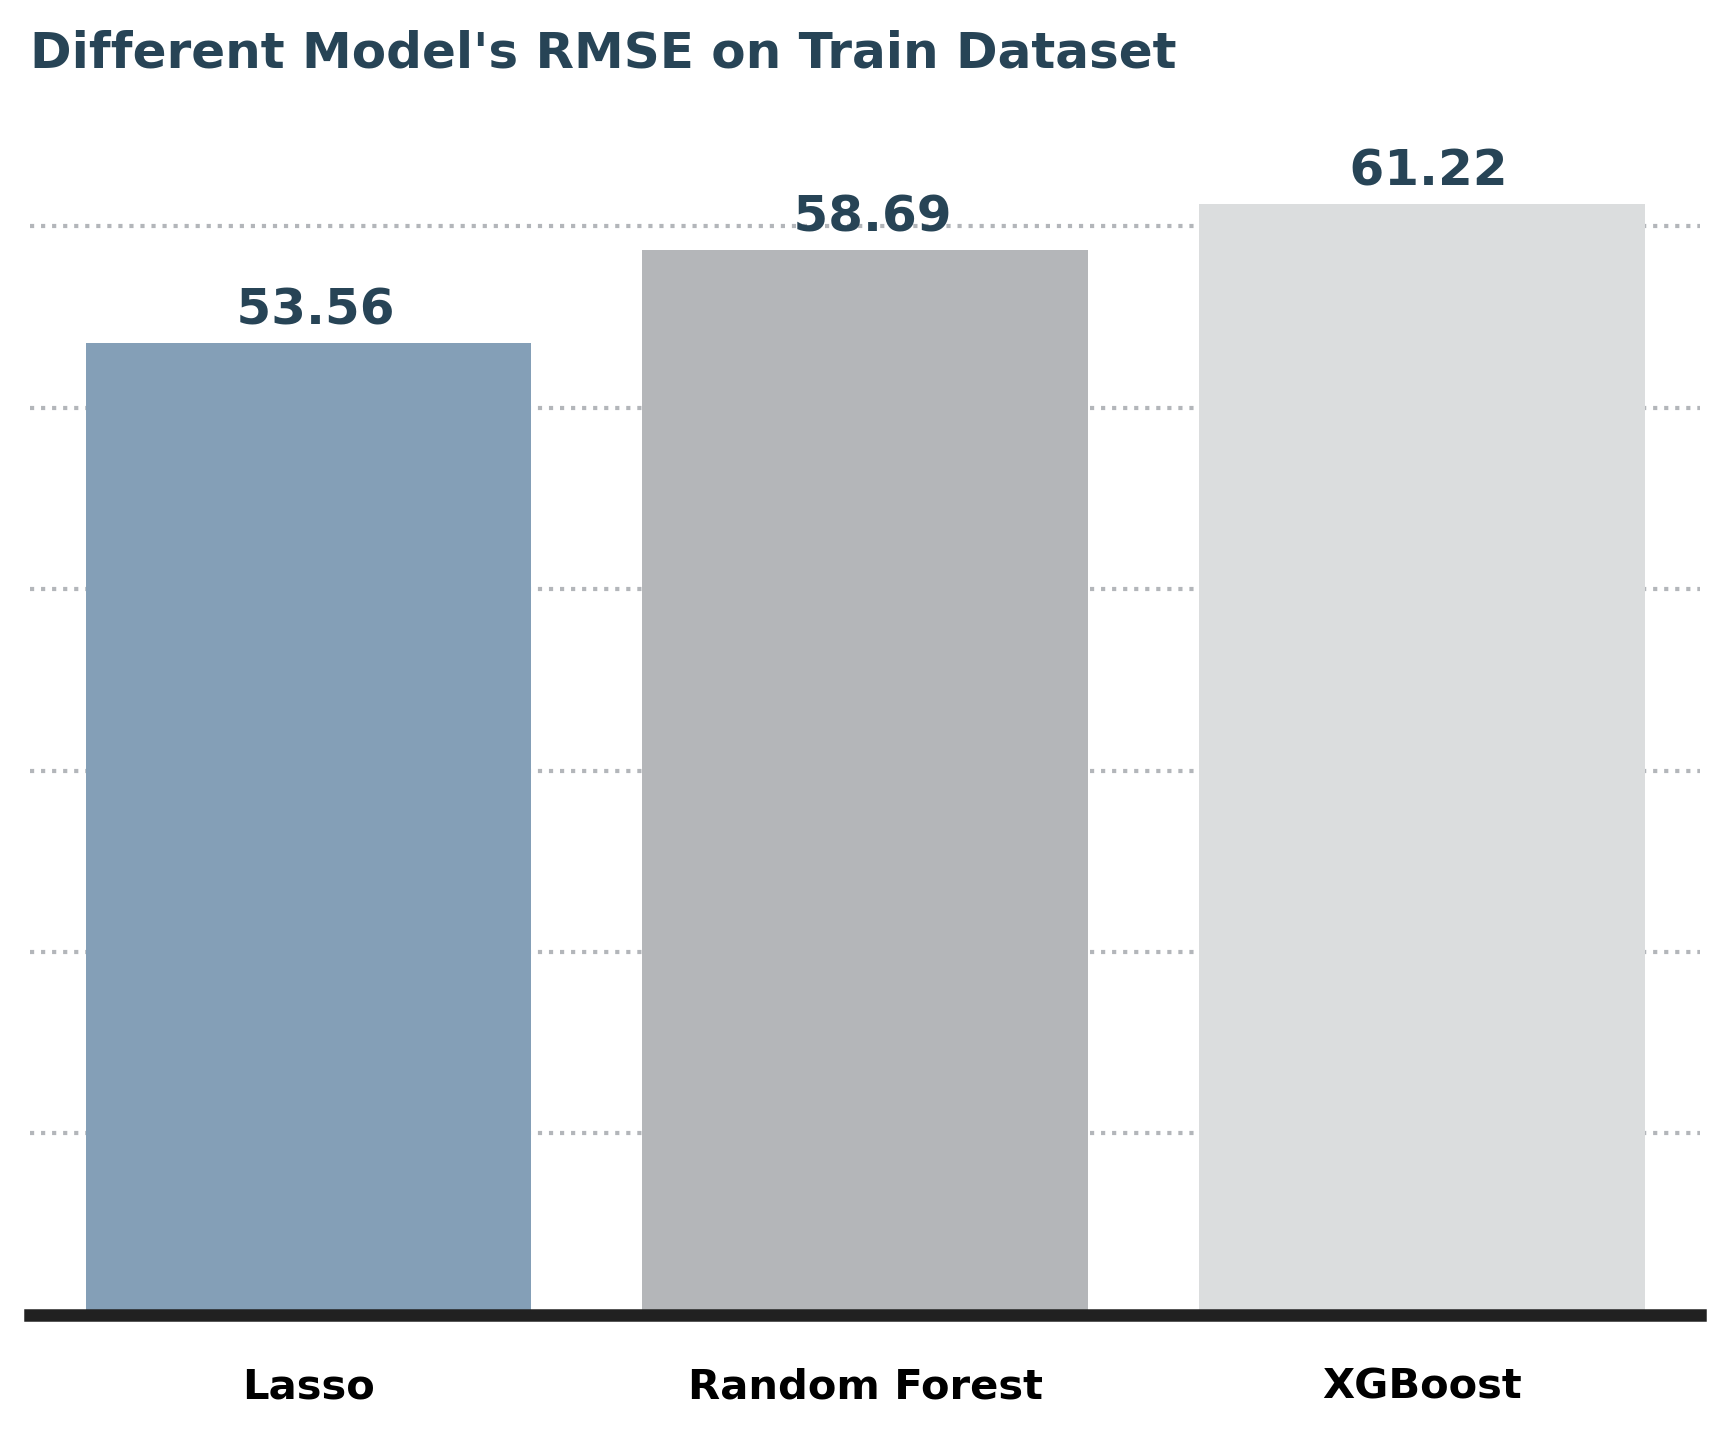

In [54]:
rmse_df = pd.DataFrame({
    'model': ['Lasso','Random Forest','XGBoost'],
    'RMSE': [lasso_rmse, rf_rmse, xg_rmse]
})

colors = ['#7BA0C0', '#B3B6BA','#dbddde']
fig, ax = plt.subplots()
g = sns.barplot(data = rmse_df, 
                x = 'model',y = 'RMSE', 
                ci = None,
                ax = ax, 
                 palette = colors
                )
# axis spine options are ['left','right','bottom','top']
ax.spines['bottom'].set_visible(True)
# make the highlighted features bold. should be the same side with the visible spine
plt.xticks(fontweight='bold')
# remove x axis grid lines that were cluttering the graph
ax.grid(b = None, axis = 'x')

g.set(xlabel='', ylabel='',title=f"Different Model's RMSE on Train Dataset\n")

ax.grid(b = None, axis = 'x')
g.set_yticklabels([])


for p in g.patches:
    rmse_ = '    {:.2f}'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()+1
    ax.annotate(rmse_, (x, y), size = 12, 
                fontweight= 'bold', color = '#274456',
               horizontalalignment='center',)

plt.show()